### conceito

O agrupamento hierárquico é um método de soft clustering que divide os dados de forma "hierárquica", tanto de forma **aglomerativa** (bottom-up) quanto **divisiva** (top-down). A clusterização aglomerativa é aquela em que inicia com cada ponto pertencendo a um cluster e, posteriormente, estes pontos se ligam a outros com base na similaridade, formando novos clusters. A clusterização divisiva inicia com somente um cluster e, posteriormente, o cluster é dividido até que se alcance o número desejado. O funcionamento segue a seguinte lógica:

    1 - calcula-se a distância entre os pontos e os mais próximos são aglomerados em um cluster;
    2 - em seguida, é calculada a distância de cada centróide em relação aos outros e estas distâncias são computadas em uma matriz de proximidade;
    3 - então, os clusters com a menor distância na matriz são aglomerados até que todos os pontos pertençam a um cluster.
    
Existem alguns métodos para o cálculo da similaridade: 

**Single Linkage (MIN)** – A distância entre os clusters é dada pela distância entre os pontos mais próximos pertencentes a cada cluster. Uma vantagem deste método é conseguir separar dados em formatos não elípticos, mas não funciona bem se houver outliers entre os grupos.

**Complete Linkage (MAX)** - A distância entre os clusters é dada pela distância entre os pontos mais distantes pertencentes a cada cluster. Este método funciona bem para outliers.

**Average Linkage** – A distância entre os clusters é dada pela média das distâncias entre um ponto de um cluster e os demais pontos do outro cluster. Este método funciona bem para outliers.

**Ward’s Method** – Funciona como o Average Linkage, mas calcula a soma do quadrado das distâncias. Este método funciona bem para outliers.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importando dados

data = pd.read_csv('../bases/wholesale_customers_data.csv', sep = ',')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# normalizando dados

from sklearn.preprocessing import normalize

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


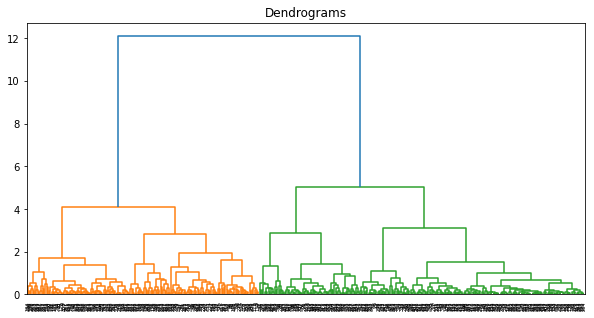

In [4]:
# plotando o dendograma

import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))

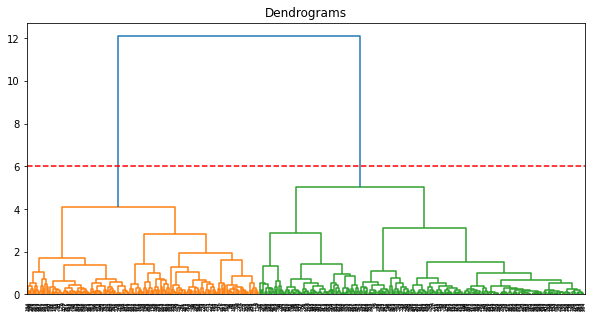

In [5]:
# determinando a threshold

plt.figure(figsize = (10, 5))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method = 'ward'))
plt.axhline(y = 6, color = 'r', linestyle = '--')

In [6]:
# aplicando o método de clusterização hierárquica com nº de clusteres = 2

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

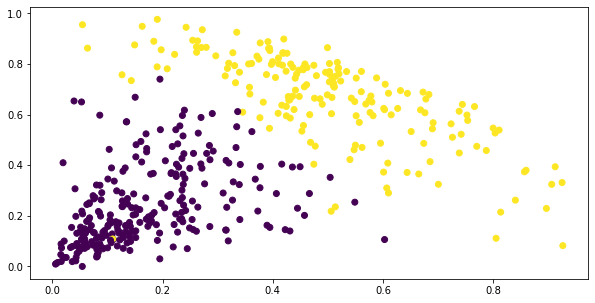

In [7]:
# plotando o gráfico de dispersão com os 2 clusteres

plt.figure(figsize = (10, 5))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c = cluster.labels_) 